In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# bring in the six packs
df_train = pd.read_csv('../input/train.csv')

In [3]:
# check the decoration
df_train.columns
# 列名取得

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#descriptive statistics summary
df_train['SalePrice'].describe()
# 各columnのデータ数、平均、分散などの統計量をざっと見る．
# デフォルトでは数値データのみサマリが確認できます。 describe(include='all')と指定すると、数値以外のデータも確認できます。

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

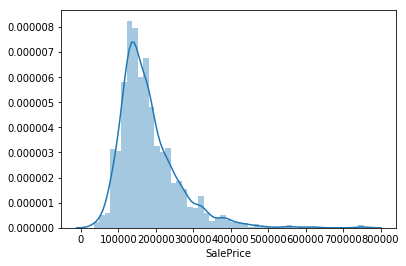

In [5]:
#histogram
sns.distplot(df_train['SalePrice']);
# seabornは使いづらいmatplotlibを使いやすくしてくれるラッパー
# https://qiita.com/hik0107/items/3dc541158fceb3156ee0
# ソフトウェアやプログラム部品などが提供するクラスや関数、
# データ型などを本来とは異なる環境や方法で利用できるようにしたものをラッパーという

In [6]:
print("Skewness: %f" % df_train['SalePrice'].skew())
# skew歪度をだす
print("Kurtosis: %f" % df_train['SalePrice'].kurt())
# kurt：尖度

Skewness: 1.882876
Kurtosis: 6.536282


      SalePrice  GrLivArea
0        208500       1710
1        181500       1262
2        223500       1786
3        140000       1717
4        250000       2198
5        143000       1362
6        307000       1694
7        200000       2090
8        129900       1774
9        118000       1077
10       129500       1040
11       345000       2324
12       144000        912
13       279500       1494
14       157000       1253
15       132000        854
16       149000       1004
17        90000       1296
18       159000       1114
19       139000       1339
20       325300       2376
21       139400       1108
22       230000       1795
23       129900       1060
24       154000       1060
25       256300       1600
26       134800        900
27       306000       1704
28       207500       1600
29        68500        520
...         ...        ...
1430     192140       1838
1431     143750        958
1432      64500        968
1433     186500       1792
1434     160000       1126
1

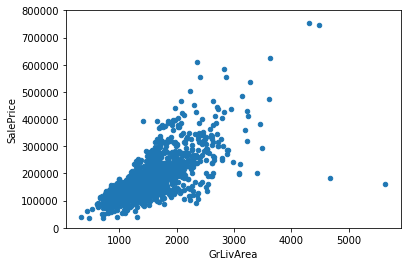

In [8]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
# print(data)
# http://sinhrks.hatenablog.com/entry/2015/01/28/073327
# concatはデータを連結させる
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
# scatter：散布図をだす

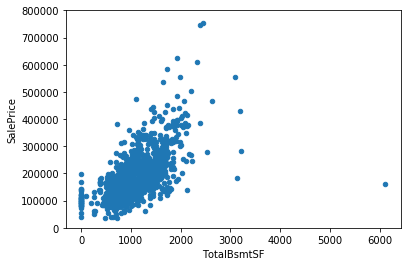

In [11]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
# axis=1：横方向に合体
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

(-0.5, 9.5, 0, 800000)

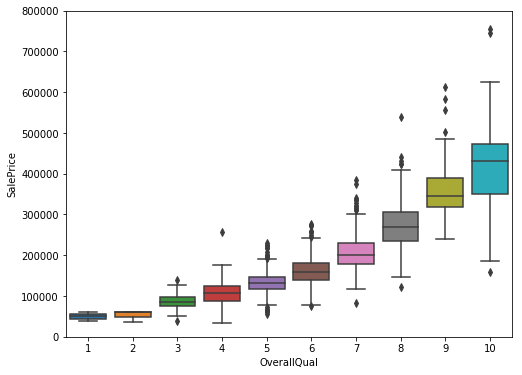

In [14]:
# box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var],], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
# x, yはnames of variables
# data = Dataset for plotting
# https://ja.wikipedia.org/wiki/%E7%AE%B1%E3%81%B2%E3%81%92%E5%9B%B3
fig.axis(ymin=0, ymax=800000)

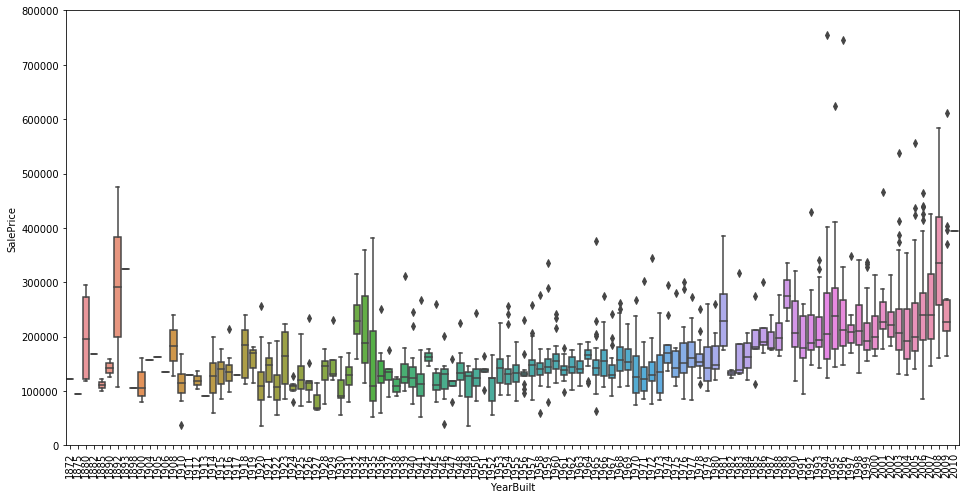

In [21]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y = "SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

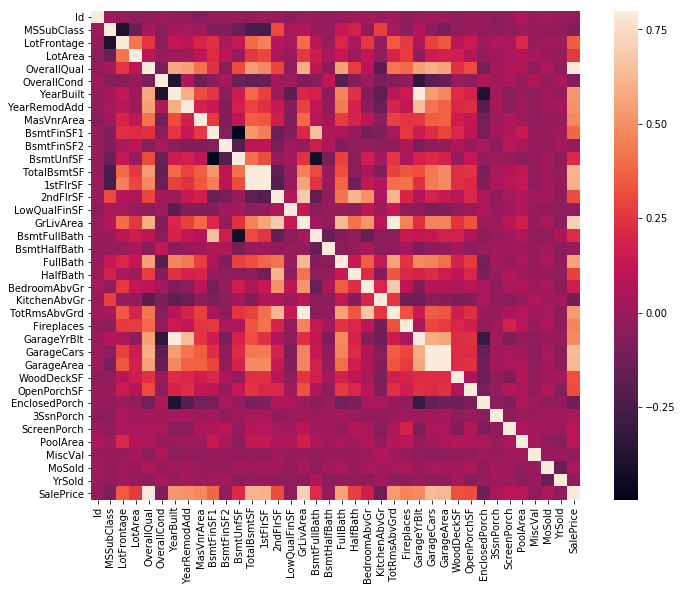

In [23]:
# correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

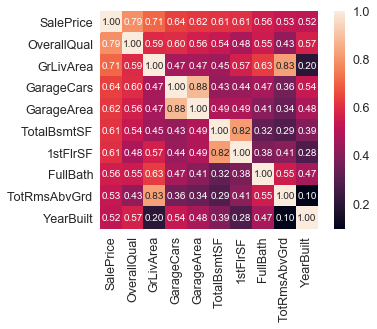

In [26]:
# salesprice correlation matrix
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
# 値の大きいものを取り出す。
cm = np.corrcoef(df_train[cols].values.T)
# 相関係数を計算
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                                annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()